In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

In [71]:
df = pd.read_excel('Data/Online_Retail.xlsx')

In [89]:
print(f'This data has {df.shape[0]} rows and {df.shape[1]} columns.')
df.head()

This data has 374895 rows and 8 columns.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [74]:
cols = df.columns
cols

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [76]:
numericalColumns = ['Quantity','UnitPrice']
df[numericalColumns].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [78]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [79]:
df.dropna(inplace = True)
df.reset_index(inplace = True,drop = True)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
406824,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
406825,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [81]:
df.duplicated().sum()

np.int64(5225)

In [83]:
df.drop_duplicates(inplace = True)
df.reset_index(inplace = True,drop = True)
df.duplicated().sum()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


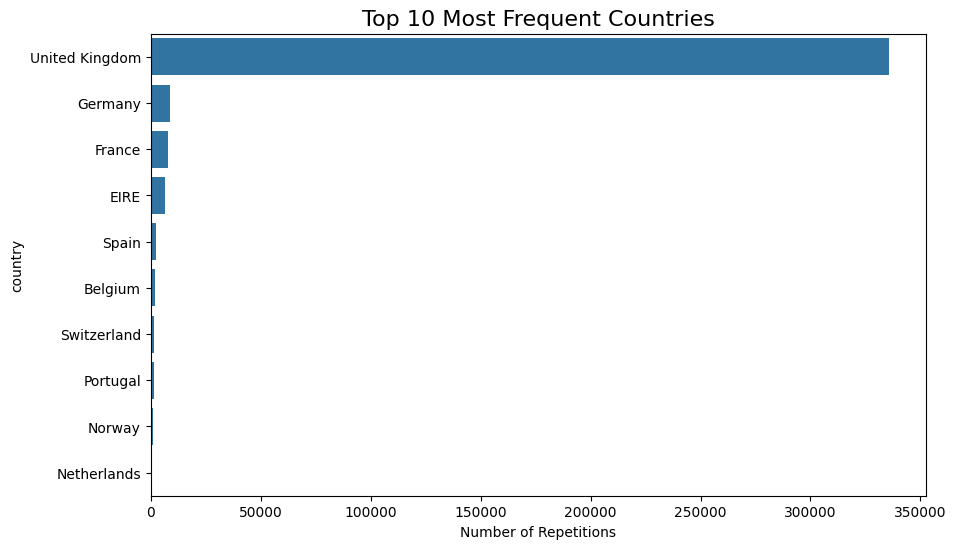

In [93]:
countryCount = df.Country.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=countryCount.values, y=countryCount.index)
plt.title("Top 10 Most Frequent Countries", fontsize=16)
plt.xlabel("Number of Repetitions")
plt.ylabel("country")
plt.show()

In [45]:
#plt.figure(0)
#plt.grid(True)
# filtered_df = df.loc[(df['Quantity']>-20000) & (df['Quantity']<20000) & (df['UnitPrice']>-5000) & (df['UnitPrice']<20000)]
# plt.scatter(filtered_df['Quantity'], filtered_df['UnitPrice'])
# plt.scatter(df['Quantity']>-20000 and df['Quantity']<20000, df['UnitPrice']>-5000 and df['UnitPrice']<20000)
#plt.show()


# df = df.loc[(df['Quantity']>-4500) & (df['Quantity']<4500) & (df['UnitPrice']>-5000) & (df['UnitPrice']<10000)]

# # Scale the data
# scaler = StandardScaler()
# df_scaled = scaler.fit_transform(df)

# # Apply K-Means clustering
# kmeans = KMeans(n_clusters=3)
# kmeans.fit(df_scaled)

# # Predict the cluster labels
# labels = kmeans.predict(df_scaled)

# # Plot the scatter plot
# plt.scatter(df['Quantity'], df['UnitPrice'], c=labels)
# plt.xlabel('Quantity')
# plt.ylabel('UnitPrice')
# plt.title('K-Means Clustering on OnlineRetail Data')
# plt.show()

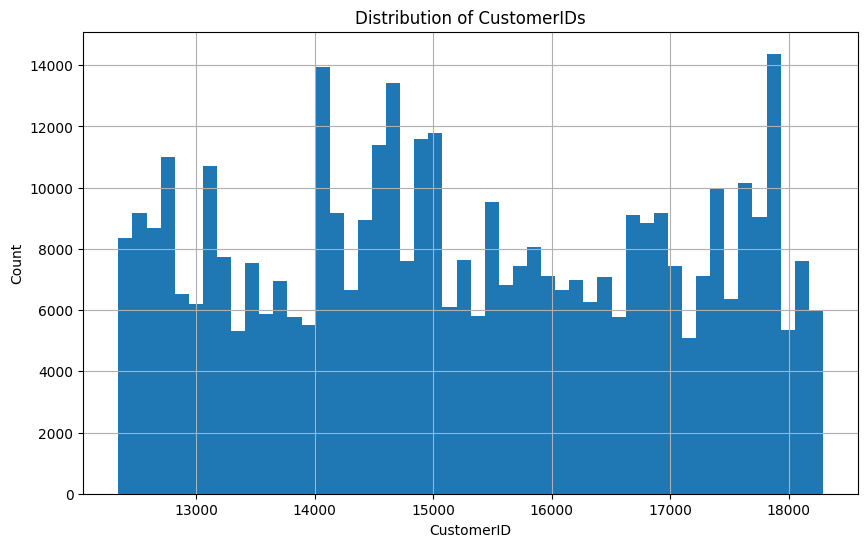

In [46]:
plt.figure(figsize=(10, 6))
df['CustomerID'].hist(bins=50)
plt.title('Distribution of CustomerIDs')
plt.xlabel('CustomerID')
plt.ylabel('Count')
plt.show()

#**LABEL ENCODING FOR CATEGORICAL COLUMNS**

In [102]:
new_df = df.copy()

In [103]:
le = LabelEncoder()

categories = ['InvoiceNo','StockCode','Description','InvoiceDate','Country']

for category in categories:
    
        new_df[category] = le.fit_transform(new_df[category].astype(str))
        
        
new_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,3232,3692,6,0,2.55,17850.0,35
1,0,2636,3700,6,0,3.39,17850.0,35
2,0,2840,855,8,0,2.75,17850.0,35
3,0,2788,1802,6,0,3.39,17850.0,35
4,0,2787,2757,6,0,3.39,17850.0,35
...,...,...,...,...,...,...,...,...
401599,17315,1461,2249,12,19149,0.85,12680.0,13
401600,17315,1737,690,6,19149,2.10,12680.0,13
401601,17315,2077,696,4,19149,4.15,12680.0,13
401602,17315,2078,695,4,19149,4.15,12680.0,13


In [104]:
new_df.describe()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,374895.000000,374895.000000,374895.000000,374895.000000,374895.000000,374895.000000,374895.000000,374895.000000
mean,9273.674103,1564.653543,2013.908108,6.879241,10179.915094,3.614527,15296.045058,32.921922
std,5176.698332,835.474691,1082.528231,6.772503,5592.252940,72.195519,1712.766633,6.607627
min,0.000000,0.000000,0.000000,-12.000000,0.000000,0.000000,12347.000000,0.000000
25%,4714.000000,941.000000,1134.000000,2.000000,5249.000000,1.250000,13969.000000,35.000000
50%,9608.000000,1518.000000,1976.000000,4.000000,10687.000000,1.950000,15159.000000,35.000000
75%,13654.000000,2092.000000,2930.000000,12.000000,15088.000000,3.750000,16800.000000,35.000000
max,20658.000000,3664.000000,3870.000000,26.000000,19149.000000,38970.000000,18287.000000,36.000000


#**NORMALIZING THE DATA**

#**HANDLING OUTLIERS**

In [87]:
q1 = df["Quantity"].quantile(0.25)
q3 = df["Quantity"].quantile(0.75)
iqr = q3 - q1      #interquartile range

upper_limit = q3 + (1.5 * iqr)
lower_limit = q1 - (1.5 * iqr)

df = df.loc[(df["Quantity"] < upper_limit) & (df["Quantity"] > lower_limit)]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
401599,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
401600,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
401601,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
401602,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [85]:
print("Upper limit:", upper_limit)
print("Lower limit:", lower_limit)


Upper limit: 27.0
Lower limit: -13.0


In [88]:
df[numericalColumns].describe()

,Quantity,UnitPrice
count,374895.000000,374895.000000
mean,6.879241,3.614527
std,6.772503,72.195519
min,-12.000000,0.000000
25%,2.000000,1.250000
50%,4.000000,1.950000
75%,12.000000,3.750000
max,26.000000,38970.000000
